In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from tensorflow.keras.datasets import imdb

(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=1000)

word_index = imdb.get_word_index()

In [73]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

review_len = 50
train_x = pad_sequences(train_x, truncating="pre", padding="pre", maxlen=review_len)
test_x = pad_sequences(test_x, truncating="pre", padding="pre", maxlen=review_len)

In [66]:
print(train_x[0])

[  2  56  26 141   6 194   2  18   4 226  22  21 134 476  26 480   5 144
  30   2  18  51  36  28 224  92  25 104   4 226  65  16  38   2  88  12
  16 283   5  16   2 113 103  32  15  16   2  19 178  32]


In [67]:
index_word = dict([(v,k) for (k,v) in word_index.items()])

In [68]:
for k in train_x[0]:
    print(index_word[k], end=" ")

and she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script their with her and most that with wasn't to with and acting watch an for with and film want an 

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM, Dense


model = Sequential()
model.add(Embedding(input_dim = 1000, output_dim =  100, mask_zero=True))
model.add(LSTM(50))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         100000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 130,251
Trainable params: 130,251
Non-trainable params: 0
_________________________________________________________________


In [53]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file="new.png")

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [80]:
batch=32
# model.compile("rmsprop", "mse")
model.fit(train_x, train_y, batch_size=batch, epochs=2, validation_data=(test_x, test_y))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 43s 2ms/sample - loss: 0.1337 - val_loss: 0.1677
Epoch 2/2
25000/25000 [==============================] - 37s 1ms/sample - loss: 0.1262 - val_loss: 0.1432


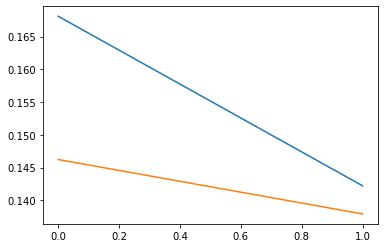

In [79]:
df = pd.DataFrame(model.history.history)
plt.plot(df)

In [84]:
model.evaluate(test_x, test_y, batch_size=batch)

25000/25000 [==============================] - 8s 301us/sample - loss: 0.1432


0.14323003858566286